# Tensorflow v2 tutorial

## Mnist dataset introduction

Most examples are using MNIST dataset of handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

## Overview of mnist dataset

In [1]:
# Import mnist dataset using keras
import tensorflow as tf
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()


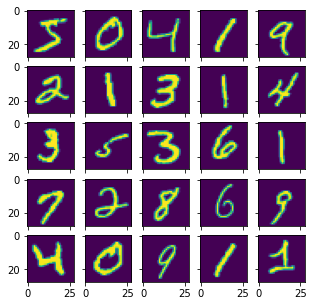

In [2]:
import matplotlib.pyplot as plt
SIZE_FIG = 5
fig, axs = plt.subplots(SIZE_FIG, SIZE_FIG, sharex=True, sharey=True)
fig.set_figwidth(SIZE_FIG)
fig.set_figheight(SIZE_FIG)
for i in range(0, SIZE_FIG):
    for j in range(0, SIZE_FIG):
        axs[i, j].imshow(x_train[i*SIZE_FIG+j])


In [3]:
%reset -f

## Hello world

In [4]:
import tensorflow as tf
# Following code creates a tensor
hello=tf.constant("hello world")
print(hello)

2022-01-29 18:57:07.540234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


tf.Tensor(b'hello world', shape=(), dtype=string)


2022-01-29 18:57:07.580464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 18:57:07.581581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 18:57:07.644441: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-29 18:57:07.734195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
# To access a Tensor value call numpy()
print(hello.numpy())

b'hello world'


In [6]:
%reset -f

## Basic tensor operations

In [7]:
import tensorflow as tf

# Define tensor constants
a=tf.constant(2)
b=tf.constant(3)
c=tf.constant(5)

In [8]:
# Arithmetic operations in tensorflow api, result in a tensor
add=tf.add(a,b)
print(add)
sub=tf.subtract(a,b)
print(sub)
mul=tf.multiply(a,b)
print(mul)
div=tf.divide(a,b)
print(div)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(0.6666666666666666, shape=(), dtype=float64)


In [9]:
# Arithmetic operations in python api, result in a tensor
add=a+b
print(add)
sub=a-b
print(sub)
mul=a*b
print(mul)
div=a/b
print(div)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(0.6666666666666666, shape=(), dtype=float64)


In [10]:
# More arithmetic api
tf_mean=tf.reduce_mean([a,b,c])
print(tf_mean)
tf_max=tf.reduce_max([a,b,c])
print(tf_max)
tf_min=tf.reduce_min([a,b,c])
print(tf_min)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [11]:
%reset -f

## Linear regression

This example is using a low-level approach to better understand all mechanics behind the training process.

In [12]:
# Parameters
LEARNING_RATE=0.01
TRAINING_STEPS=1000
DISPLAY_STEP=200

In [13]:
# Create training data
import numpy as np
train_x = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
              7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
              2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])


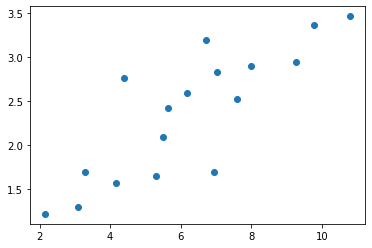

In [14]:
# Visualize training data
import matplotlib.pyplot as plt
fig,axs=plt.subplots()
axs.scatter(train_x,train_y)

In [15]:
import tensorflow as tf
weight=tf.Variable(np.random.randn(),name="weight")
bias=tf.Variable(np.random.randn(),name="bias")
print(weight)
print(bias)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.41324067>
<tf.Variable 'bias:0' shape=() dtype=float32, numpy=1.06508>


In [16]:
# Linear regression
def linear_regression(x,w,b):
    return w*x+b

In [17]:
# Mean square error
def mean_square(y_hat,y):
    return tf.reduce_mean(tf.square(y_hat-y))

In [18]:
# Stochastic gradient descent optimizer
optimizer=tf.optimizers.SGD(LEARNING_RATE)

In [19]:
# Optimization process
def run_optimization(x,y,w,b):
    with tf.GradientTape() as g:
        y_hat=linear_regression(x,w,b)
        cost=mean_square(y_hat,y)
    # Compute gradients
    gradients=g.gradient(cost,[w,b])
    # Update parameters
    optimizer.apply_gradients(zip(gradients,[w,b]))

In [20]:
# Run training for the given number of steps
for step in range(0,TRAINING_STEPS):
    run_optimization(train_x,train_y,weight,bias)
    if step%DISPLAY_STEP==0:
        y_hat=linear_regression(train_x,weight,bias)
        cost=mean_square(y_hat,train_y)
        print("step %d, cost %f, weight %f, bias %f" % (step,cost,weight,bias))
        

step 0, cost 0.177332, weight 0.236943, bias 1.039622
step 200, cost 0.156513, weight 0.230975, bias 0.945268
step 400, cost 0.154862, weight 0.238929, bias 0.888879
step 600, cost 0.154238, weight 0.243821, bias 0.854200
step 800, cost 0.154001, weight 0.246829, bias 0.832872


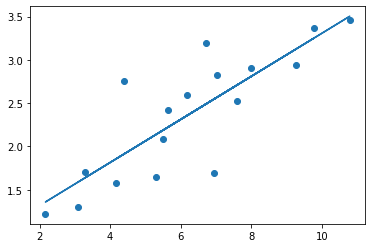

In [21]:
fig,axs=plt.subplots()
axs.scatter(train_x,train_y)
axs.plot(train_x,linear_regression(train_x,weight,bias).numpy())

In [22]:
%reset -f